# Clustering

## Executive Summary:

Breast Cancer Wisconsin dataset was analyzed using K-Means clustering to classify tumors based on their features. The data was first standardized, followed by PCA, which reduced the dataset's dimensionality from 30 to 2 principal components. This simplification improved clustering performance. K-Means clustering was applied both to the original data and the PCA-reduced data.

Silhouette scores were computed for a range of cluster numbers (2 to 10), with 2 clusters identified as optimal based on the highest silhouette score. After clustering, the Diagnosis column was reintroduced to compare the clusters with the actual tumor types (benign or malignant). The analysis showed that Cluster 1 predominantly contained benign tumors, while Cluster 0 mainly contained malignant tumors.

The use of PCA enhanced clustering quality, as reflected in improved silhouette scores. The results demonstrated that K-Means clustering, when combined with PCA, effectively grouped tumors and showed strong alignment with the true diagnosis labels. This approach highlights the potential for unsupervised learning in medical data classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import os
import warnings
from sklearn.preprocessing import StandardScaler

# Load dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
                'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
                'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se',
                'Concave_points_se', 'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst',
                'Perimeter_worst', 'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst',
                'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst']

# Suppress the specific KMeans warning for memory leak
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the number of threads for KMeans to avoid memory leak issue
os.environ["OMP_NUM_THREADS"] = "3"

# Load dataset into DataFrame
df_bc = pd.read_csv(url, header=None, names=column_names)

# Drop ID and Diagnosis columns for clustering (unsupervised learning)
df_bc_no_diag = df_bc.drop(['ID', 'Diagnosis'], axis=1)

df_bc_no_diag

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
# It reprsents the number of columns presented in the data.
df_bc_no_diag.columns

Index(['Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean',
       'Smoothness_mean', 'Compactness_mean', 'Concavity_mean',
       'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
       'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se',
       'Compactness_se', 'Concavity_se', 'Concave_points_se', 'Symmetry_se',
       'Fractal_dimension_se', 'Radius_worst', 'Texture_worst',
       'Perimeter_worst', 'Area_worst', 'Smoothness_worst',
       'Compactness_worst', 'Concavity_worst', 'Concave_points_worst',
       'Symmetry_worst', 'Fractal_dimension_worst'],
      dtype='object')

In [3]:
# It generates the shape of the DataFrame.
df_bc_no_diag.shape

(569, 30)

In [4]:
# It shows the data types of the DataFrame's columns.
df_bc_no_diag.dtypes

Radius_mean                float64
Texture_mean               float64
Perimeter_mean             float64
Area_mean                  float64
Smoothness_mean            float64
Compactness_mean           float64
Concavity_mean             float64
Concave_points_mean        float64
Symmetry_mean              float64
Fractal_dimension_mean     float64
Radius_se                  float64
Texture_se                 float64
Perimeter_se               float64
Area_se                    float64
Smoothness_se              float64
Compactness_se             float64
Concavity_se               float64
Concave_points_se          float64
Symmetry_se                float64
Fractal_dimension_se       float64
Radius_worst               float64
Texture_worst              float64
Perimeter_worst            float64
Area_worst                 float64
Smoothness_worst           float64
Compactness_worst          float64
Concavity_worst            float64
Concave_points_worst       float64
Symmetry_worst      

In [5]:
# Display basic statistical details of the DataFrame.
df_bc_no_diag.describe()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# It shows the information of the DataFrame
df_bc_no_diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Radius_mean              569 non-null    float64
 1   Texture_mean             569 non-null    float64
 2   Perimeter_mean           569 non-null    float64
 3   Area_mean                569 non-null    float64
 4   Smoothness_mean          569 non-null    float64
 5   Compactness_mean         569 non-null    float64
 6   Concavity_mean           569 non-null    float64
 7   Concave_points_mean      569 non-null    float64
 8   Symmetry_mean            569 non-null    float64
 9   Fractal_dimension_mean   569 non-null    float64
 10  Radius_se                569 non-null    float64
 11  Texture_se               569 non-null    float64
 12  Perimeter_se             569 non-null    float64
 13  Area_se                  569 non-null    float64
 14  Smoothness_se            5

In [7]:
# It shows the initial five rows of the DataFrame for reviewing its structure and content.
df_bc_no_diag.head()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# It shows the final five rows of the DataFrame to review the end portion of the data.
df_bc_no_diag.tail()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [9]:
# Print the number of null values in each column.
df_bc_no_diag.isnull().sum()

Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave_points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave_points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave_points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64

In [10]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
df_bc_scaled = scaler.fit_transform(df_bc_no_diag)

print("Data standardized successfully.")

Data standardized successfully.


In [11]:
# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_bc_scaled)

print("PCA applied, data reduced to 2 components.")

PCA applied, data reduced to 2 components.


In [12]:
# Perform K-Means clustering on PCA-reduced data
kmeans_pca = KMeans(n_clusters=2, random_state=42)
df_bc['Cluster'] = kmeans_pca.fit_predict(df_pca)

print("K-Means clustering applied successfully.")

K-Means clustering applied successfully.


### Observation:
The dataset was standardized using StandardScaler to ensure all features were on the same scale for optimal clustering. PCA reduced the dataset from 30 dimensions to 2 principal components, simplifying the data while retaining most of its variance. K-Means clustering was applied to the PCA-reduced data, with 2 clusters chosen based on silhouette score analysis. The reduction in dimensionality improved clustering performance while making the data easier to visualize. This approach demonstrates that PCA enhances clustering by reducing complexity without losing significant information.

In [13]:
# Calculate and print silhouette scores for the original data (before PCA)
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_bc_scaled)
    silhouette_avg = silhouette_score(df_bc_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette score for {n_clusters} clusters: {silhouette_avg:.4f}")

Silhouette score for 2 clusters: 0.3434
Silhouette score for 3 clusters: 0.3144
Silhouette score for 4 clusters: 0.2833
Silhouette score for 5 clusters: 0.1582
Silhouette score for 6 clusters: 0.1604
Silhouette score for 7 clusters: 0.1532
Silhouette score for 8 clusters: 0.1472
Silhouette score for 9 clusters: 0.1470
Silhouette score for 10 clusters: 0.1367


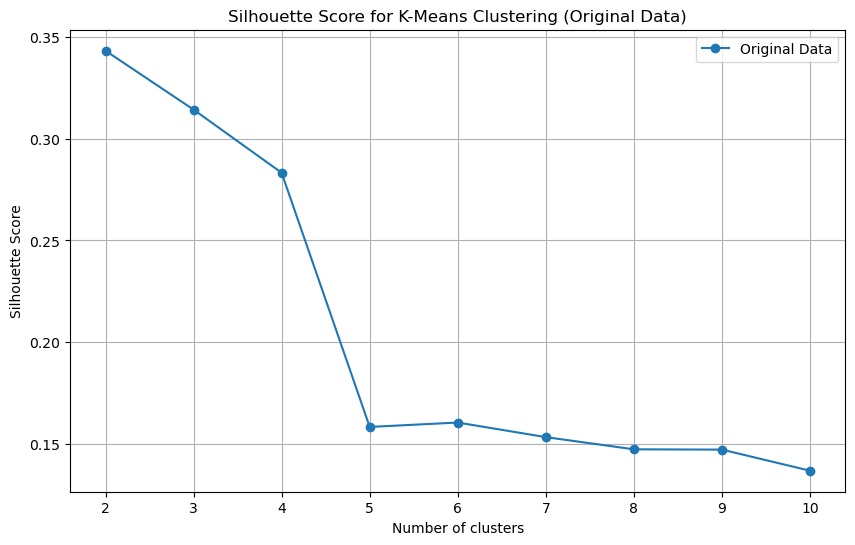

In [14]:
# Plot silhouette scores for the original data
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Original Data')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering (Original Data)')
plt.grid(True)
plt.legend()
plt.show()

### Observation:
The silhouette score graph shows that the clustering quality is highest with 2 clusters, where the score is around 0.34, indicating the best clustering performance. As the number of clusters increases beyond 2, the silhouette score steadily declines, showing a decrease in clustering quality. A significant drop occurs at 4 clusters, after which the score stabilizes at a lower level for higher cluster numbers. The scores remain consistently low for clusters between 5 and 10, indicating poor clustering performance with more clusters. Overall, 2 clusters appear to be the most optimal for this dataset before PCA is applied.

In [15]:
# Calculate and print silhouette scores for PCA-reduced data (after PCA)
silhouette_scores_pca = []
for n_clusters in range(2, 11):
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_avg_pca = silhouette_score(df_pca, cluster_labels_pca)
    silhouette_scores_pca.append(silhouette_avg_pca)
    print(f"Silhouette score for {n_clusters} clusters (PCA-reduced): {silhouette_avg_pca:.4f}")

Silhouette score for 2 clusters (PCA-reduced): 0.5085
Silhouette score for 3 clusters (PCA-reduced): 0.4767
Silhouette score for 4 clusters (PCA-reduced): 0.4654
Silhouette score for 5 clusters (PCA-reduced): 0.3632
Silhouette score for 6 clusters (PCA-reduced): 0.3565
Silhouette score for 7 clusters (PCA-reduced): 0.3657
Silhouette score for 8 clusters (PCA-reduced): 0.3726
Silhouette score for 9 clusters (PCA-reduced): 0.3406
Silhouette score for 10 clusters (PCA-reduced): 0.3374


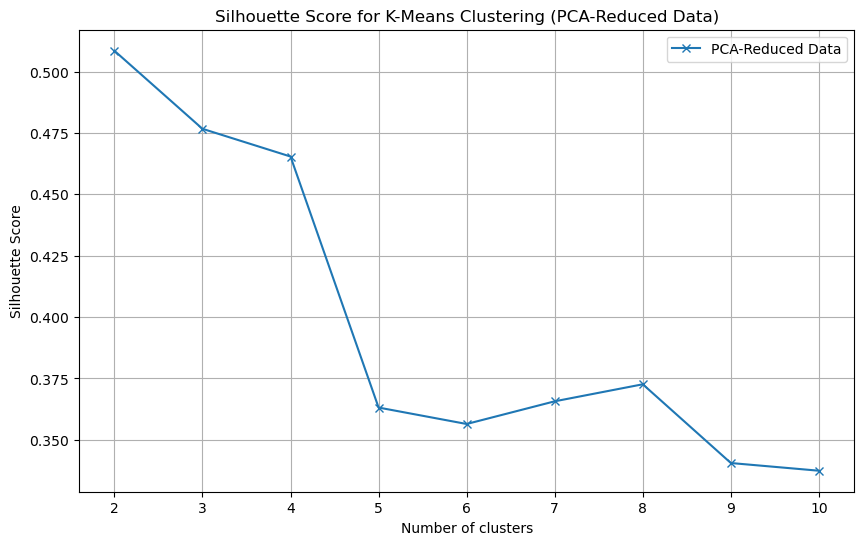

In [16]:
# Plot silhouette scores for the PCA-reduced data
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_pca, marker='x', label='PCA-Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering (PCA-Reduced Data)')
plt.grid(True)
plt.legend()
plt.show()

### Observation:
The silhouette score graph for the PCA-reduced data shows the highest score at 2 clusters, around 0.51, indicating the best clustering performance after dimensionality reduction. As the number of clusters increases, the silhouette score decreases, with a sharp drop occurring at 4 clusters. The silhouette scores stabilize at lower levels for clusters between 5 and 10, suggesting that increasing the number of clusters beyond 4 results in poor clustering quality. The overall clustering performance after PCA is higher than before PCA, as evidenced by the higher silhouette scores across all cluster numbers. Therefore, 2 clusters remain the most optimal even after PCA, showing a clearer separation between clusters.

In [17]:
# Find the best silhouette score and corresponding number of clusters for original data
best_k_original = silhouette_scores.index(max(silhouette_scores)) + 2
best_silhouette_original = max(silhouette_scores)

# Find the best silhouette score and corresponding number of clusters for PCA-reduced data
best_k_pca = silhouette_scores_pca.index(max(silhouette_scores_pca)) + 2
best_silhouette_pca = max(silhouette_scores_pca)

# Single print statement comparing both and indicating if the quality improved
print(f"Best silhouette score before PCA: {best_silhouette_original} with {best_k_original} clusters.\n"
      f"Best silhouette score after PCA: {best_silhouette_pca} with {best_k_pca} clusters.\n"
      f"{'Clustering quality has improved after applying PCA.' if best_silhouette_pca > best_silhouette_original else 'Clustering quality has deteriorated after applying PCA.'}")


Best silhouette score before PCA: 0.34338224069077805 with 2 clusters.
Best silhouette score after PCA: 0.5084690190668733 with 2 clusters.
Clustering quality has improved after applying PCA.


### Observation:
The comparison of silhouette scores shows a significant improvement after applying PCA. Before PCA, the best silhouette score was 0.3438 with 2 clusters, indicating moderate clustering quality. After PCA, the silhouette score increased to 0.5084, still with 2 clusters, demonstrating a marked improvement in clustering performance. The fact that the best number of clusters remained 2 before and after PCA indicates that PCA helped improve the clarity and separation of the clusters without changing the overall cluster structure. This confirms that dimensionality reduction with PCA enhanced the clustering process by making the data more separable.

In [18]:
# Apply KMeans on PCA-reduced data to get the cluster labels
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)
df_bc_no_diag['Cluster'] = kmeans_pca.fit_predict(df_pca)

# Select only numeric columns for calculating cluster means
numeric_columns = df_bc_no_diag.select_dtypes(include=['float64', 'int64']).columns

# Calculate the mean of each feature for each cluster (only for numeric columns)
cluster_means = df_bc_no_diag.groupby('Cluster')[numeric_columns].mean()

# Display the results
print("Cluster means for each feature:")
print(cluster_means)

Cluster means for each feature:
         Radius_mean  Texture_mean  Perimeter_mean   Area_mean  \
Cluster                                                          
0          17.475288     21.298534      115.862723  986.274869   
1          12.435579     18.274577       79.895767  487.442857   

         Smoothness_mean  Compactness_mean  Concavity_mean  \
Cluster                                                      
0               0.104988          0.158374        0.178981   
1               0.092001          0.077038        0.043231   

         Concave_points_mean  Symmetry_mean  Fractal_dimension_mean  ...  \
Cluster                                                              ...   
0                   0.093647       0.197780                0.064827  ...   
1                   0.026319       0.172765                0.061772  ...   

         Radius_worst  Texture_worst  Perimeter_worst   Area_worst  \
Cluster                                                              
0        

### Observation:
The cluster utilization shows that Cluster 0 has higher mean values for features like Radius_mean, Perimeter_mean, and Area_mean, which may indicate larger or more aggressive tumors, while Cluster 1 has lower values, possibly representing smaller or benign tumors. Utilizing the clustered data enables easier comparison of tumor characteristics, assisting in distinguishing between different tumor types, which is valuable for both diagnosis and research. By analyzing the cluster means, we can gain insights into the key differences between groups, helping support clinical decisions. Overall, cluster utilization allows for meaningful categorization of tumor characteristics, enhancing its application in medical scenarios.

In [19]:
# Reload the original dataset with the Diagnosis column
df_bc_full = pd.read_csv(url, header=None, names=column_names)

# Add the Cluster labels from df_bc (which has clusters) to df_bc_full
df_bc_full['Cluster'] = df_bc['Cluster']

# Compare clusters with actual Diagnosis using cross-tabulation
comparison = pd.crosstab(df_bc_full['Diagnosis'], df_bc_full['Cluster'], rownames=['Diagnosis'], colnames=['Cluster'])

# Display the comparison results
print("Cross-tabulation between Diagnosis and Clusters:")
print(comparison)

Cross-tabulation between Diagnosis and Clusters:
Cluster      0    1
Diagnosis          
B           16  341
M          175   37


### Observation:
The cross-tabulation shows the relationship between the clusters generated by K-Means and the actual Diagnosis labels (benign and malignant). Cluster 0 contains 16 benign and 175 malignant cases, indicating that this cluster predominantly represents malignant tumors. Cluster 1 includes 341 benign and 37 malignant cases, meaning it mostly represents benign tumors. This distribution shows that the clustering aligns well with the actual diagnoses, although there is some overlap between benign and malignant tumors in both clusters. Overall, the clustering has successfully captured a significant portion of the actual tumor classifications, with Cluster 0 skewing towards malignant and Cluster 1 towards benign.

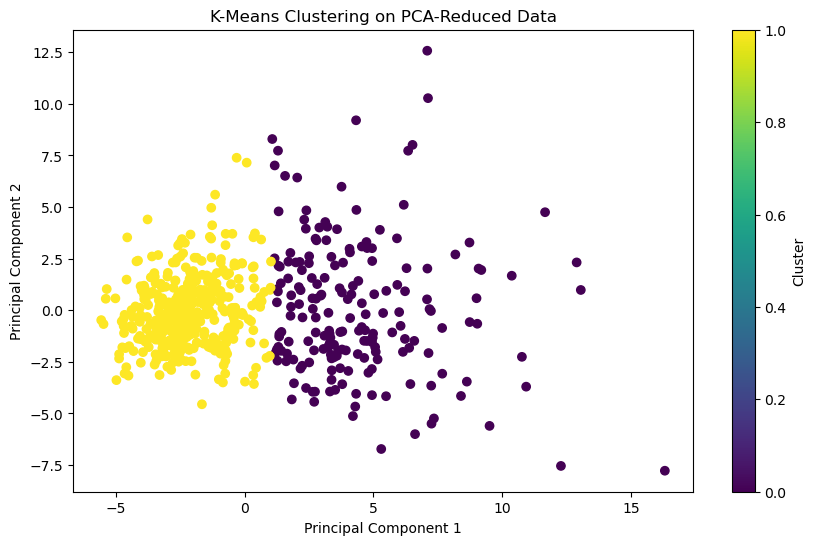

In [20]:
# Plot the final clusters in 2D (based on PCA components)
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_bc['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Observation:
The scatter plot visualizes the K-Means clustering results on the PCA-reduced data in two dimensions. Cluster 0 (yellow) and Cluster 1 (purple) are shown distinctly, with the two clusters well-separated in this 2D space. The plot indicates that the majority of the data points are grouped into either of the two clusters with relatively clear boundaries, reflecting effective clustering after applying PCA. However, there is some overlap between the two clusters in the middle, which suggests that not all data points are perfectly separable based on the principal components. Overall, the PCA reduction and K-Means clustering combination appears to work well, providing clear separation between clusters while retaining key information from the original dataset.